# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/amirmotefaker/instagram-data

Import the necessary libraries and create your dataframe(s).

In [1]:
# import pandas, matplotlib, numpy

import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

# import dataset
# I had to change encoding to 'latin1'. I do not know why I needed this to read my data, and I do not know if it will 
# effect my code/data in the future

# Looking on stackoverflow, and speaking to my ta, this should not bring up any issues down the line. 

data = pd.read_csv("instagram-data.csv", encoding = "latin1")

# check that data is loaded

print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [2]:
#Missing data percentage list

for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Impressions - 0%
From Home - 0%
From Hashtags - 0%
From Explore - 0%
From Other - 0%
Saves - 0%
Comments - 0%
Shares - 0%
Likes - 0%
Profile Visits - 0%
Follows - 0%
Caption - 0%
Hashtags - 0%


<Axes: >

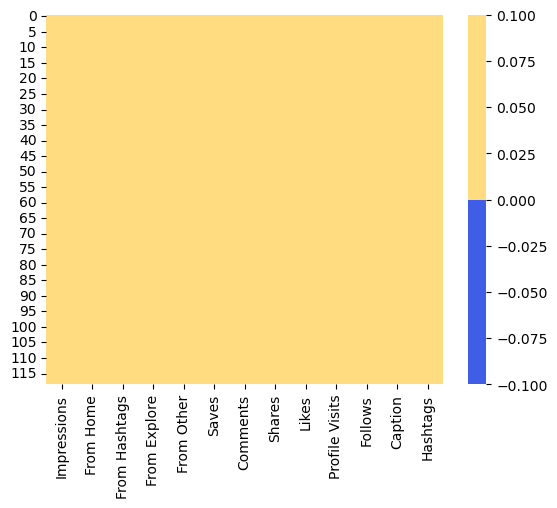

In [3]:
# Plot a heatmap of any missing data
cols = data.columns[:72] 
colours = ['#405de599', '#ffdc80'] # specify the colours - blue (#405d36) is missing. yellow (#FFDc80) is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [4]:
# No missing data was found, which matches the comments on Kaggle. 
# If any was found, I would consider using data.dropna(), on either the row or column, depending on what exactly was missing. 

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<Axes: >

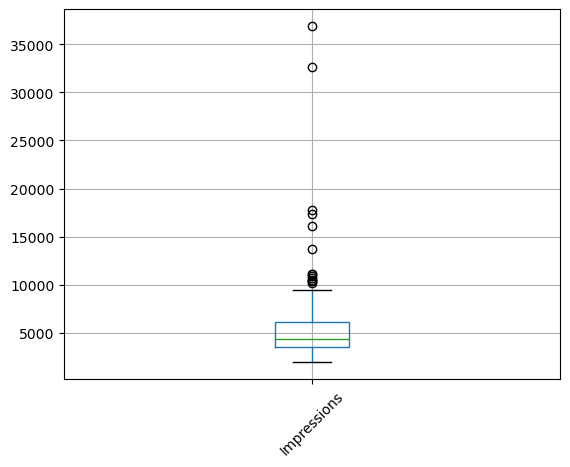

In [5]:
# Create a boxplot for a visual representation of any outliers in 'Impressions' columns
# This column was seperated due to the large range of numbers (and suspected outlier) found in the EDA

data.boxplot(column = ['Impressions'], rot = 45)

In [6]:
# Use the describe method to return a statistical summary for 'Impressions'

data['Impressions'].describe().round(2)

count      119.00
mean      5703.99
std       4843.78
min       1941.00
25%       3467.00
50%       4289.00
75%       6138.00
max      36919.00
Name: Impressions, dtype: float64

<Axes: >

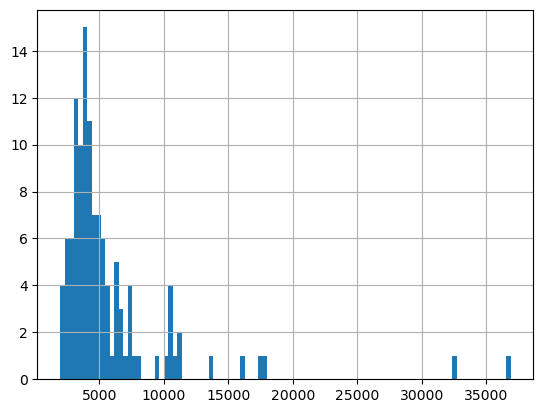

In [7]:
# Create a histogram showing distribution of data in 'Impressions'

data['Impressions'].hist(bins=100)

<Axes: >

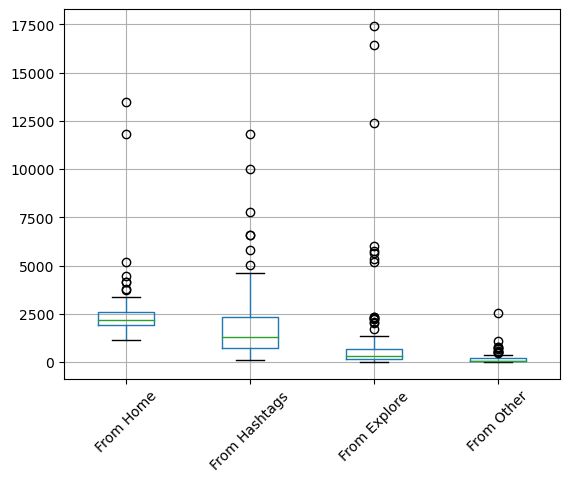

In [8]:
# Create a boxplot for a visual representation of any outliers in 'From Home', 'From Hashtags', 'From Explore', and 'From Other' columns
# There columns were grouped together due to similar information and ranges presented in the EDA

data.boxplot(column = ['From Home', 'From Hashtags', 'From Explore', 'From Other'], rot = 45)

In [9]:
# Use the describe method to return a statistical summary for the above grouped information

data[['From Home', 'From Hashtags', 'From Explore', 'From Other']].describe().round(2)

,From Home,From Hashtags,From Explore,From Other
count,119.00,119.00,119.00,119.00
mean,2475.79,1887.51,1078.10,171.09
std,1489.39,1884.36,2613.03,289.43
min,1133.00,116.00,0.00,9.00
25%,1945.00,726.00,157.50,38.00
50%,2207.00,1278.00,326.00,74.00
75%,2602.50,2363.50,689.50,196.00
max,13473.00,11817.00,17414.00,2547.00


<Axes: >

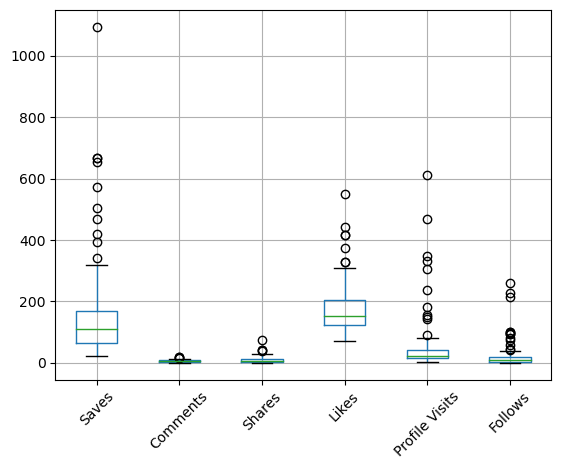

In [10]:
# Create a boxplot for a visual representation of any outliers in 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits' and 'Follows' columns
# There columns were grouped together due to similar information and ranges presented in the EDA

data.boxplot(column = ['Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows'], rot = 45)

In [11]:
# Use the describe method to return a statistical summary for the above grouped information

data[['Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']].describe().round(2)

,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.00,119.00,119.00,119.00,119.00,119.00
mean,153.31,6.66,9.36,173.78,50.62,20.76
std,156.32,3.54,10.09,82.38,87.09,40.92
min,22.00,0.00,0.00,72.00,4.00,0.00
25%,65.00,4.00,3.00,121.50,15.00,4.00
50%,109.00,6.00,6.00,151.00,23.00,8.00
75%,169.00,8.00,13.50,204.00,42.00,18.00
max,1095.00,19.00,75.00,549.00,611.00,260.00


In [12]:
# Looking at the lines where the values for 'Impressions' > 30000, those lines look to contain very high values in multiple columns. 
# I will drop these two columns, and this should solve most, if not all of my outlier issues. 

poss_imp_outliers = data[data['Impressions'] > 30000]

print(poss_imp_outliers)

poss_imp_outliers = data[data['Impressions'] > 30000].index

print(poss_imp_outliers)

     Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follows  \
117         2      75    549             148      214   
118         5      26    443             611      228   

                                               Caption  \
117  Here are some of the best data science certifi...   
118  175 Python Projects with Source Code solved an...   

                                              Hashtags  
117  #datascience #datasciencejobs #datasciencetrai...  
118  #python #pythonprogramming #pythonprojects #py...  
Int64Index([117, 118], dtype='int64')


In [13]:
data_outliers = data.drop(poss_imp_outliers, axis = 0)

In [14]:
# Check data_outliers info

data_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     117 non-null    int64 
 1   From Home       117 non-null    int64 
 2   From Hashtags   117 non-null    int64 
 3   From Explore    117 non-null    int64 
 4   From Other      117 non-null    int64 
 5   Saves           117 non-null    int64 
 6   Comments        117 non-null    int64 
 7   Shares          117 non-null    int64 
 8   Likes           117 non-null    int64 
 9   Profile Visits  117 non-null    int64 
 10  Follows         117 non-null    int64 
 11  Caption         117 non-null    object
 12  Hashtags        117 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.0+ KB


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [20]:
# Check to see if there are any duplicate rows. 

data_outliers.duplicated().sum()

17

In [21]:
# Drop the duplicate rows

data_dropped = data_outliers.drop_duplicates()

In [17]:
# Check to see if dupliacte rows have been dropped

data_dropped.duplicated().sum()

0

In [18]:
# Check info of new dataset

data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     102 non-null    int64 
 1   From Home       102 non-null    int64 
 2   From Hashtags   102 non-null    int64 
 3   From Explore    102 non-null    int64 
 4   From Other      102 non-null    int64 
 5   Saves           102 non-null    int64 
 6   Comments        102 non-null    int64 
 7   Shares          102 non-null    int64 
 8   Likes           102 non-null    int64 
 9   Profile Visits  102 non-null    int64 
 10  Follows         102 non-null    int64 
 11  Caption         102 non-null    object
 12  Hashtags        102 non-null    object
dtypes: int64(11), object(2)
memory usage: 11.2+ KB


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [25]:
# Make sure all hashtags and captions are lowercase

data_dropped['Caption Lower'] = data_dropped['Caption'].str.lower()

data_dropped['Hashtag Lower'] = data_dropped['Hashtags'].str.lower()

C:\Users\molli\AppData\Local\Temp\ipykernel_11152\3563570741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped['Caption Lower'] = data_dropped['Caption'].str.lower()
C:\Users\molli\AppData\Local\Temp\ipykernel_11152\3563570741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropped['Hashtag Lower'] = data_dropped['Hashtags'].str.lower()


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? 
    I had not found any null values, as expected from my EDA and research. Irregluar, unnecessary, and inconsistent data has been found and corrected. 
2. Did the process of cleaning your data give you new insights into your dataset?
    I had not realized that I had duplicate rows before. Now I wonder if captions and hashtags are actually repeated, or if it was just repeated information.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
    I feel like scatter plots are going to be the best way to visualize a lot of my information. I also want to see is there is a way to visualize the  frquency of hashtags with a word cloud in Tableau.